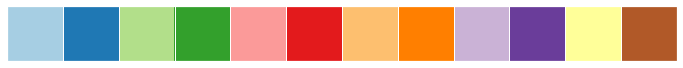

In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
from matplotlib import pyplot as plt
from IPython.display import display, Markdown
import re
sns.set()
# Save a palette to a variable:
palette = sns.color_palette("Paired")
# Use palplot and pass in the variable:
sns.palplot(palette)

## Load all the dataset
#### For this analysis, only data btw 2010 and 2021 are used.

In [35]:
games = pd.read_csv('../datasets/curated_data/games.csv')
games_details = pd.read_csv('../datasets/curated_data/game_details.csv')
nba_df = pd.read_csv('../datasets/curated_data/full_dataset.csv')

#### Describe the shapes of datasets

In [9]:
def print_missing_values(df):
    df_null = pd.DataFrame(len(df) - df.notnull().sum(), columns = ['Count'])
    df_null = df_null[df_null['Count'] > 0].sort_values(by='Count', ascending=False)
    df_null = df_null/len(df)*100

    if len(df_null) == 0:
        display(Markdown('No missing value.'))
        return

    x = df_null.index.values
    height = [e[0] for e in df_null.values]

    fig, ax = plt.subplots(figsize=(20, 5))
    ax.bar(x, height, width=0.8)
    plt.xticks(x, x, rotation=60)
    plt.xlabel('Columns')
    plt.ylabel('Percentage')
    plt.title('Percentage of missing values in columns')
    plt.show()

def dataset_overview(df, df_name):
    display(Markdown(f'### {df_name} dataset overview'))
    display(Markdown(f'dataset shape : {df.shape}'))
    display(Markdown(f'#### Display 5 first rows'))
    display(df.head())
    display(Markdown('*****'))
    display(Markdown(f'#### Describe dataset'))
    display(df.describe().T)
    display(Markdown('*****'))
    display(Markdown(f'#### Missing values'))
    print_missing_values(df)

In [10]:
dataset_overview(nba_df, 'Complete NBA Dataset')

### Complete NBA Dataset dataset overview

dataset shape : (14144, 70)

#### Display 5 first rows

,GAME_DATE_EST,GAME_ID,HOME_TEAM_ID,HOME_TEAM_NAME,VISITOR_TEAM_ID,VISITOR_TEAM_NAME,SEASON,PTS_home,FG_PCT_home,FT_PCT_home,...,FT_MISSED_away,EFFICACY_away,EFG_away,PTS_FGA_away,PIE_away,POSS_away,PACE_away,OFF_EFC_away,DEF_EFC_away,HOME_TEAM_WINS
0,2021-11-17,22100213,1610612766,CHA,1610612764,WAS,2021,97.0,0.438,0.500,...,3.0,13.71,0.38,0.76,10.86,77.68,97.48,98.0,101.0,1
1,2021-11-17,22100214,1610612765,DET,1610612754,IND,2021,97.0,0.425,0.750,...,5.0,9.57,0.41,0.83,6.93,82.85,96.30,89.0,103.0,1
2,2021-11-17,22100215,1610612737,ATL,1610612738,BOS,2021,110.0,0.506,0.833,...,3.0,17.83,0.55,1.10,12.91,84.12,103.66,118.0,124.0,1
3,2021-11-17,22100216,1610612751,BKN,1610612739,CLE,2021,109.0,0.458,0.840,...,1.0,15.00,0.45,0.91,11.08,83.06,102.90,102.0,122.0,1
4,2021-11-17,22100217,1610612748,MIA,1610612740,NOP,2021,113.0,0.483,0.824,...,5.0,15.67,0.66,1.31,11.00,78.08,102.01,114.0,137.0,1


*****

#### Describe dataset

,count,mean,std,min,25%,50%,75%,max
GAME_ID,14144.0,2.279664e+07,5.002070e+06,1.190010e+07,2.130006e+07,2.150113e+07,2.180098e+07,5.200021e+07
HOME_TEAM_ID,14144.0,1.610613e+09,8.639914e+00,1.610613e+09,1.610613e+09,1.610613e+09,1.610613e+09,1.610613e+09
VISITOR_TEAM_ID,14144.0,1.610613e+09,8.651375e+00,1.610613e+09,1.610613e+09,1.610613e+09,1.610613e+09,1.610613e+09
SEASON,14144.0,2.015072e+03,3.177155e+00,2.010000e+03,2.012000e+03,2.015000e+03,2.018000e+03,2.021000e+03
PTS_home,14144.0,1.052390e+02,1.304228e+01,5.900000e+01,9.600000e+01,1.050000e+02,1.140000e+02,1.610000e+02
...,...,...,...,...,...,...,...,...
POSS_away,14144.0,7.954746e+01,8.812277e+00,2.419000e+01,7.403000e+01,7.961000e+01,8.506000e+01,1.278000e+02
PACE_away,14144.0,9.935508e+01,1.104455e+01,4.905000e+01,9.197000e+01,9.845000e+01,1.057825e+02,2.325600e+02
OFF_EFC_away,14144.0,1.094979e+02,1.459192e+01,2.500000e+01,1.000000e+02,1.090000e+02,1.190000e+02,2.000000e+02
DEF_EFC_away,14144.0,1.123541e+02,1.462636e+01,2.200000e+01,1.030000e+02,1.120000e+02,1.210000e+02,2.200000e+02


*****

#### Missing values

No missing value.

In [11]:
dataset_overview(games, 'NBA Games Dataset')

### NBA Games Dataset dataset overview

dataset shape : (14145, 22)

#### Display 5 first rows

,GAME_DATE_EST,GAME_ID,HOME_TEAM_ID,HOME_TEAM_NAME,VISITOR_TEAM_ID,VISITOR_TEAM_NAME,SEASON,PTS_home,FG_PCT_home,FT_PCT_home,...,REB_home,ELO_BEFORE_home,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,ELO_BEFORE_away,HOME_TEAM_WINS
0,2021-11-17,22100213,1610612766,CHA,1610612764,WAS,2021,97.0,0.438,0.500,...,59.0,1470.819854,87.0,0.367,0.813,0.190,23.0,48.0,1552.358321,1
1,2021-11-17,22100214,1610612765,DET,1610612754,IND,2021,97.0,0.425,0.750,...,42.0,1350.477922,89.0,0.418,0.737,0.243,14.0,43.0,1505.640628,1
2,2021-11-17,22100215,1610612737,ATL,1610612738,BOS,2021,110.0,0.506,0.833,...,40.0,1536.159014,99.0,0.440,0.824,0.268,24.0,42.0,1513.537935,1
3,2021-11-17,22100216,1610612751,BKN,1610612739,CLE,2021,109.0,0.458,0.840,...,47.0,1584.716761,99.0,0.393,0.857,0.250,20.0,50.0,1450.264258,1
4,2021-11-17,22100217,1610612748,MIA,1610612740,NOP,2021,113.0,0.483,0.824,...,39.0,1577.036926,98.0,0.440,0.786,0.286,18.0,38.0,1407.723030,1


*****

#### Describe dataset

,count,mean,std,min,25%,50%,75%,max
GAME_ID,14145.0,2.279587e+07,5.002732e+06,1.190010e+07,2.130006e+07,2.150113e+07,2.180098e+07,5.200021e+07
HOME_TEAM_ID,14145.0,1.610613e+09,8.640343e+00,1.610613e+09,1.610613e+09,1.610613e+09,1.610613e+09,1.610613e+09
VISITOR_TEAM_ID,14145.0,1.610613e+09,8.651370e+00,1.610613e+09,1.610613e+09,1.610613e+09,1.610613e+09,1.610613e+09
SEASON,14145.0,2.015072e+03,3.177214e+00,2.010000e+03,2.012000e+03,2.015000e+03,2.018000e+03,2.021000e+03
PTS_home,14145.0,1.052375e+02,1.304304e+01,5.900000e+01,9.600000e+01,1.050000e+02,1.140000e+02,1.610000e+02
FG_PCT_home,14145.0,4.618826e-01,5.572427e-02,2.570000e-01,4.230000e-01,4.610000e-01,5.000000e-01,6.840000e-01
FT_PCT_home,14145.0,7.638995e-01,1.023962e-01,1.430000e-01,7.000000e-01,7.690000e-01,8.330000e-01,1.000000e+00
FG3_PCT_home,14145.0,3.585417e-01,1.013840e-01,0.000000e+00,2.940000e-01,3.570000e-01,4.230000e-01,8.420000e-01
AST_home,14145.0,2.322496e+01,5.154473e+00,8.000000e+00,2.000000e+01,2.300000e+01,2.700000e+01,5.000000e+01
REB_home,14145.0,4.389848e+01,6.628613e+00,1.700000e+01,3.900000e+01,4.400000e+01,4.800000e+01,7.200000e+01


*****

#### Missing values

No missing value.

In [12]:
dataset_overview(games_details, 'NBA Games-Player Details Dataset')

### NBA Games-Player Details Dataset dataset overview

dataset shape : (28290, 34)

#### Display 5 first rows

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,MIN,FGM,FGA,FG3M,FG3A,FTM,FTA,...,FG3_PCT,FT_PCT,EFFICACY,EFG,PTS_FGA,PIE,POSS,PACE,OFF_EFC,DEF_EFC
0,11900101,1610612746,LAC,177.383333,32.0,72.0,16.0,41.0,12.0,14.0,...,0.39,0.86,11.11,0.56,1.12,8.36,76.13,102.27,121.0,99.0
1,11900101,1610612753,ORL,148.966667,26.0,61.0,5.0,24.0,17.0,20.0,...,0.21,0.85,9.00,0.37,0.74,6.14,75.05,121.78,99.0,121.0
2,11900102,1610612743,DEN,200.000000,28.0,63.0,10.0,31.0,23.0,28.0,...,0.32,0.82,12.50,0.60,1.20,8.97,82.59,99.11,108.0,92.0
3,11900102,1610612764,WAS,171.333333,28.0,71.0,9.0,27.0,11.0,16.0,...,0.33,0.69,9.12,0.50,1.00,6.86,82.59,115.69,92.0,108.0
4,11900103,1610612740,NOP,79.083333,12.0,32.0,4.0,14.0,3.0,3.0,...,0.29,1.00,9.75,0.42,0.86,7.95,55.11,171.18,56.0,113.0


*****

#### Describe dataset

,count,mean,std,min,25%,50%,75%,max
GAME_ID,28290.0,2.279587e+07,5.002644e+06,1.190010e+07,2.130006e+07,2.150113e+07,2.180098e+07,5.200021e+07
TEAM_ID,28290.0,1.610613e+09,8.645713e+00,1.610613e+09,1.610613e+09,1.610613e+09,1.610613e+09,1.610613e+09
MIN,28290.0,2.160396e+02,1.742443e+01,6.108333e+01,2.053167e+02,2.163667e+02,2.268333e+02,3.368000e+02
FGM,28290.0,3.564146e+01,5.578095e+00,9.000000e+00,3.200000e+01,3.600000e+01,3.900000e+01,6.000000e+01
FGA,28290.0,7.724486e+01,8.949276e+00,2.100000e+01,7.100000e+01,7.700000e+01,8.300000e+01,1.290000e+02
FG3M,28290.0,8.533687e+00,3.947472e+00,0.000000e+00,6.000000e+00,8.000000e+00,1.100000e+01,2.700000e+01
FG3A,28290.0,2.343761e+01,8.409073e+00,2.000000e+00,1.700000e+01,2.300000e+01,2.900000e+01,6.900000e+01
FTM,28290.0,1.622739e+01,5.927980e+00,0.000000e+00,1.200000e+01,1.600000e+01,2.000000e+01,4.700000e+01
FTA,28290.0,2.109929e+01,7.250638e+00,1.000000e+00,1.600000e+01,2.100000e+01,2.600000e+01,6.400000e+01
OREB,28290.0,9.206822e+00,3.744145e+00,0.000000e+00,7.000000e+00,9.000000e+00,1.200000e+01,3.800000e+01


*****

#### Missing values

No missing value.

In [13]:
# Print the % of home team wins over the seasons
def barplot_hometeam_wins_over_year(df):
    subset = df.groupby(['SEASON', 'HOME_TEAM_WINS'], as_index=False).size()
    season_count = df.groupby('SEASON', as_index=False).size()
    subset = pd.merge(subset, season_count, left_on='SEASON', right_on='SEASON', how='right')
    subset.rename({'size_x':'COUNT', 'size_y':'TOT'}, inplace=True, axis=1)
    subset['HOME_WINS_PCT'] = round((subset['COUNT'] / subset['TOT']) * 100, 2)
    figure = sns.catplot(
        data=subset, kind="bar",
        x="SEASON", y="HOME_WINS_PCT", hue="HOME_TEAM_WINS",
        ci="sd", palette="dark", alpha=.8, height=6, aspect=11.7/8.27
    )
    figure.despine(left=True)
    figure.set_axis_labels("Season", "%")


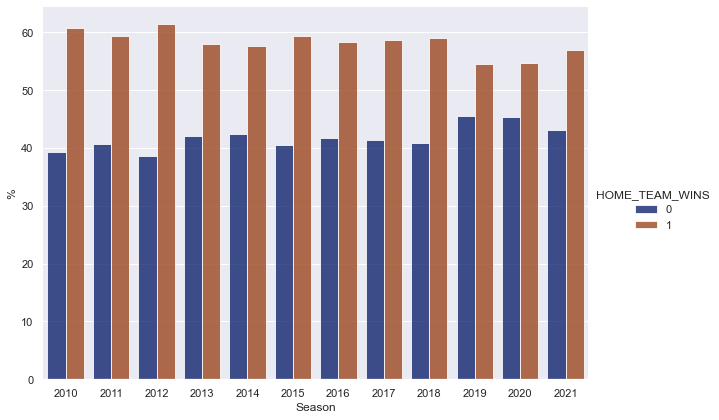

In [14]:
barplot_hometeam_wins_over_year(nba_df)

In [15]:
def plot_barplot_pct_home_wins(df):
    subset = df.groupby('HOME_TEAM_WINS', as_index=False).size()
    subset['HOME_WINS_PCT'] = round((subset['size'] / df.shape[0]) * 100, 2)
    figure = sns.catplot(
        data=subset, kind="bar",
        x="HOME_TEAM_WINS", y="HOME_WINS_PCT", hue="HOME_TEAM_WINS",
        ci="sd", palette="dark", alpha=.8, height=6, aspect=11.7/9.27
    )
    figure.despine(left=True)
    figure.set_axis_labels("Home Team Wins", "%")

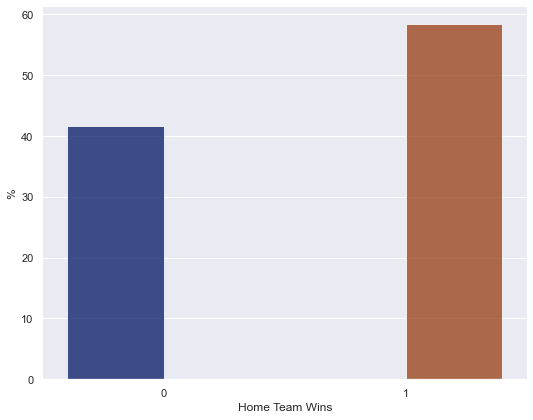

In [16]:
plot_barplot_pct_home_wins(df=nba_df)

In [17]:
def plot_relplot(df, x_col, y_col, hue, x_label, y_label, title='', legend_lbl=None):
    if legend_lbl is None:
        legend_lbl = []
    figure = sns.relplot(data=df, x=x_col, y=y_col,
                         hue=hue, style='HOME_TEAM_WINS',
                         ci="sd", palette="deep", alpha=.8,
                         height=6.27, aspect=11.7/8.27)
    figure.set_axis_labels(x_label, y_label)
    figure._legend.set_title(title)
    for t, l in zip(figure._legend.texts, legend_lbl):
        t.set_text(l)


In [18]:
def plot_multiscatterplot(df, title, x_first_ax, y_first_ax, labels_first_ax, legend_title_first_ax,
                          x_second_ax, y_second_ax, labels_second_ax, legend_title_second_ax):
    fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(20,7.5))
    plt.suptitle(title)
    sns.scatterplot(data=df, x=x_first_ax, y=y_first_ax, ax=ax[0],
                    hue='HOME_TEAM_WINS', style='HOME_TEAM_WINS',
                    ci="sd", palette="deep", alpha=.8)

    sns.scatterplot(data=df, x=x_second_ax, y=y_second_ax, ax=ax[1],
                    hue='HOME_TEAM_WINS', style='HOME_TEAM_WINS',
                    ci="sd", palette="deep", alpha=.8)
    legend_labels,_ = ax[0].get_legend_handles_labels()
    ax[0].legend(legend_labels,labels_first_ax, title=legend_title_first_ax)

    legend_labels,_ = ax[1].get_legend_handles_labels()
    ax[1].legend(legend_labels, labels_second_ax, title=legend_title_second_ax)

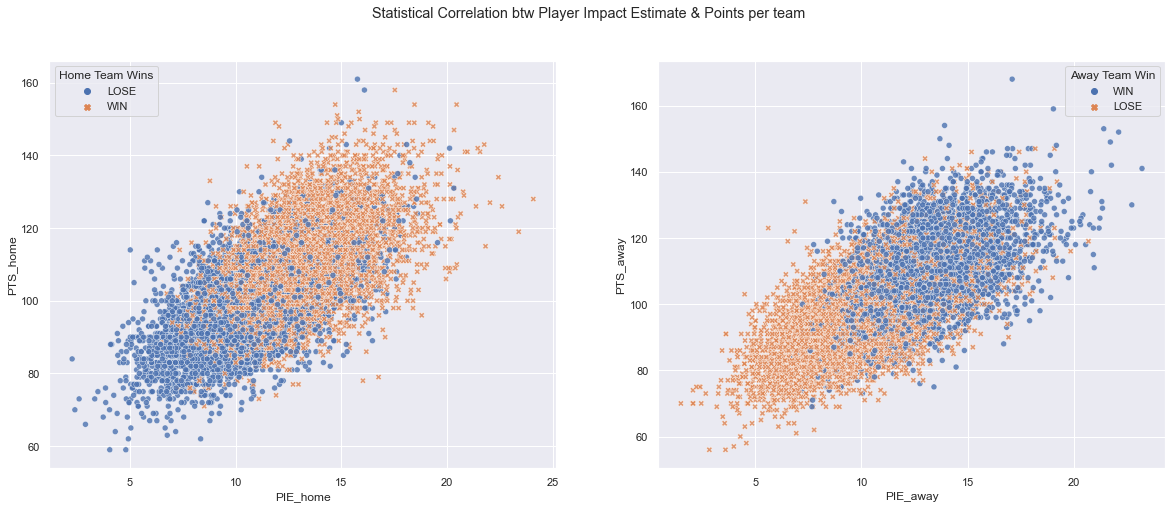

In [19]:
plot_multiscatterplot(df=nba_df, x_first_ax='PIE_home', y_first_ax='PTS_home',
                      labels_first_ax=['LOSE', 'WIN'], legend_title_first_ax='Home Team Wins',
                      x_second_ax='PIE_away', y_second_ax='PTS_away',
                      labels_second_ax=['WIN', 'LOSE'], legend_title_second_ax='Away Team Win',
                      title='Statistical Correlation btw Player Impact Estimate & Points per team')

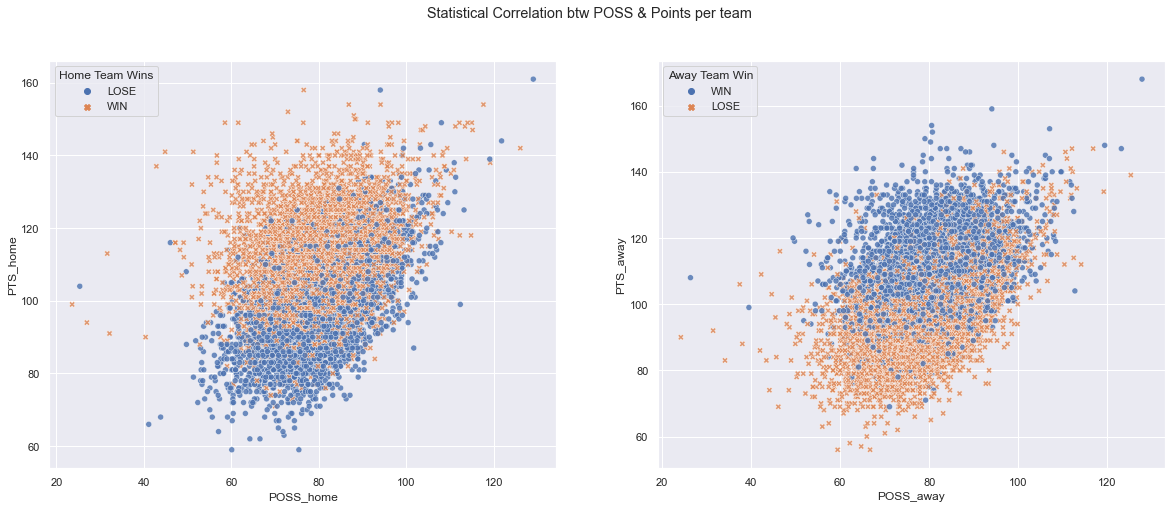

In [20]:
plot_multiscatterplot(df=nba_df, x_first_ax='POSS_home', y_first_ax='PTS_home',
                      labels_first_ax=['LOSE', 'WIN'], legend_title_first_ax='Home Team Wins',
                      x_second_ax='POSS_away', y_second_ax='PTS_away',
                      labels_second_ax=['WIN', 'LOSE'], legend_title_second_ax='Away Team Win',
                      title='Statistical Correlation btw POSS & Points per team')

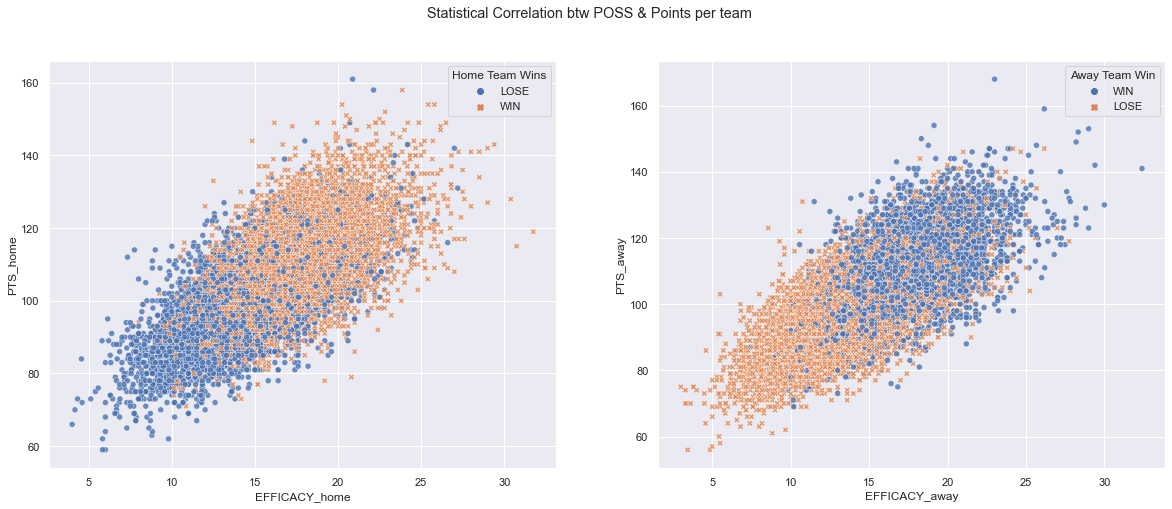

In [21]:
plot_multiscatterplot(df=nba_df, x_first_ax='EFFICACY_home', y_first_ax='PTS_home',
                      labels_first_ax=['LOSE', 'WIN'], legend_title_first_ax='Home Team Wins',
                      x_second_ax='EFFICACY_away', y_second_ax='PTS_away',
                      labels_second_ax=['WIN', 'LOSE'], legend_title_second_ax='Away Team Win',
                      title='Statistical Correlation btw POSS & Points per team')

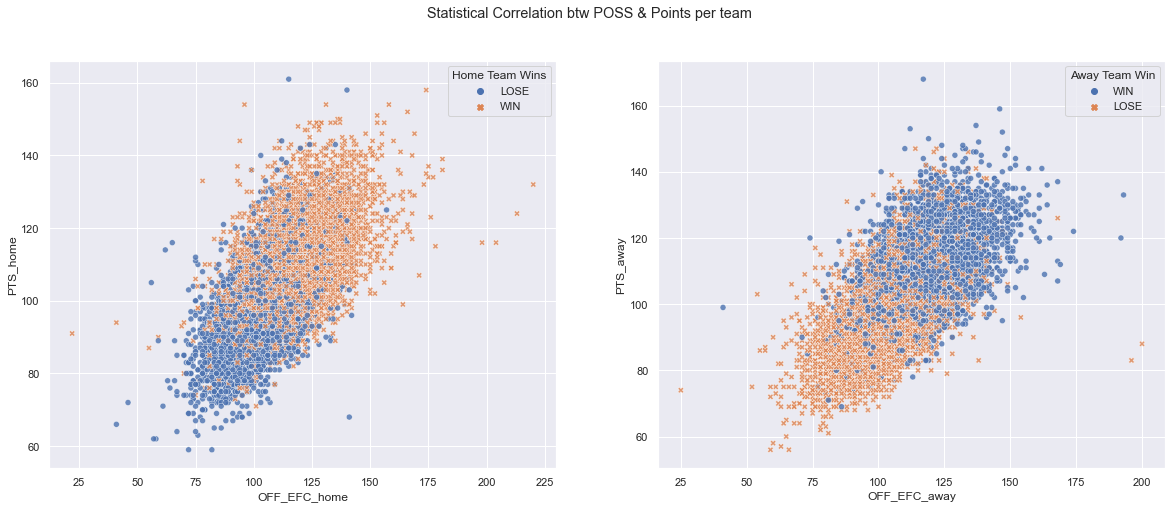

In [22]:
plot_multiscatterplot(df=nba_df, x_first_ax='OFF_EFC_home', y_first_ax='PTS_home',
                      labels_first_ax=['LOSE', 'WIN'], legend_title_first_ax='Home Team Wins',
                      x_second_ax='OFF_EFC_away', y_second_ax='PTS_away',
                      labels_second_ax=['WIN', 'LOSE'], legend_title_second_ax='Away Team Win',
                      title='Statistical Correlation btw POSS & Points per team')

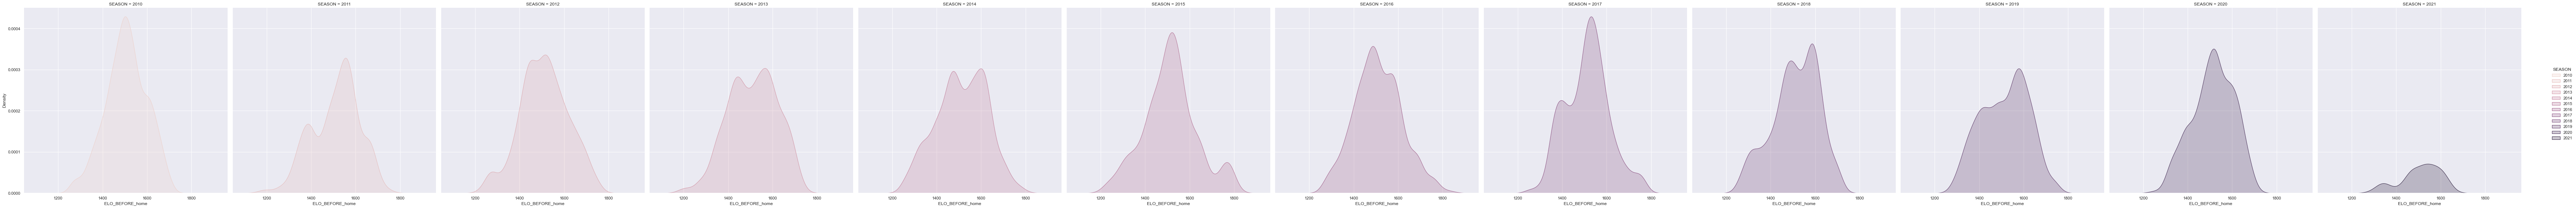

In [24]:
sns.displot(nba_df, x="ELO_BEFORE_home", hue="SEASON", col="SEASON", kind="kde", fill=True, height=8)

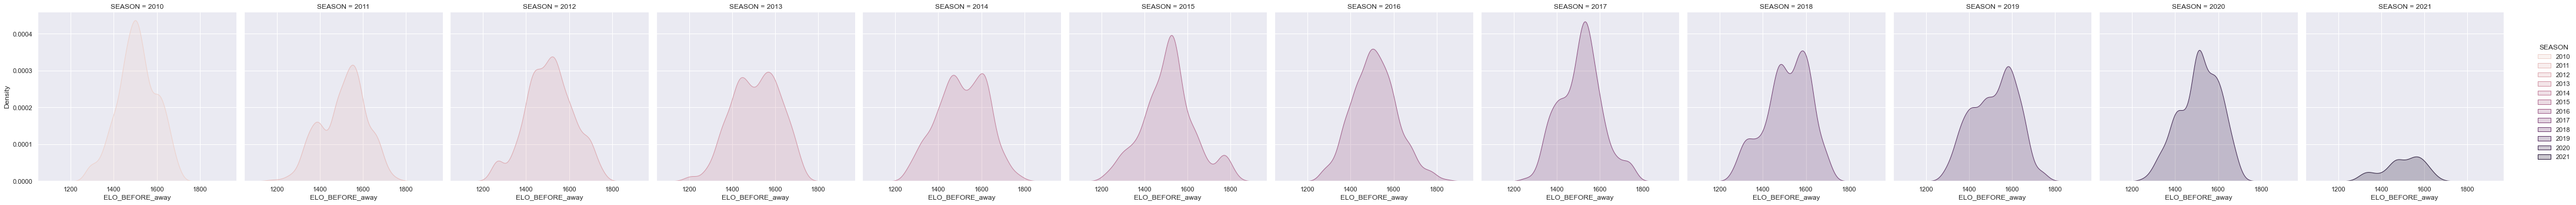

In [28]:
sns.displot(nba_df, x="ELO_BEFORE_away", hue="SEASON", col="SEASON", kind="kde", fill=True, height=5)

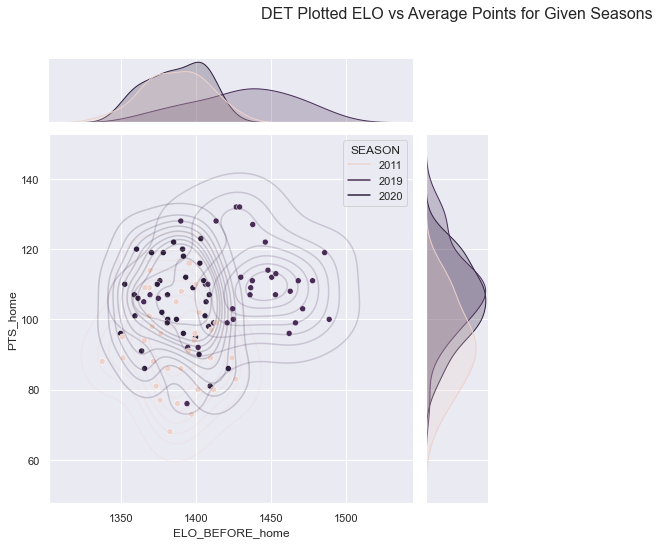

In [38]:
data = nba_df[nba_df['HOME_TEAM_NAME'] == 'DET']
random_seasons = np.random.choice(list(set(nba_df['SEASON'].values)), size=3, replace=False)
data = data[data['SEASON'].isin(random_seasons)]


g = sns.jointplot(data = data, x="ELO_BEFORE_home", y="PTS_home", hue="SEASON", height=7, )
plt.title("{} Plotted ELO vs Average Points for Given Seasons".format('DET'), y=1.3, fontsize = 16)
g.plot_joint(sns.kdeplot, alpha=0.2)


# Pre Processing Data for Prediction

In [25]:
#Adjust type of game_date
nba_df['GAME_DATE_EST'] = pd.to_datetime(nba_df['GAME_DATE_EST'], format='%Y-%m-%d')

In [26]:
#TMP dataframe that we use later to merge with avg dataframe
nba_tmp_df = nba_df[['GAME_DATE_EST', 'GAME_ID', 'HOME_TEAM_NAME', 'VISITOR_TEAM_NAME', 'ELO_BEFORE_home', 'ELO_BEFORE_away', 'HOME_TEAM_WINS']]


In [27]:
def get_list_of_seasons(df):
    return df['SEASON'].sort_values().reset_index(drop=True).unique()

def get_season_stats_df(df, season):
    return df[df['SEASON'] == season].sort_values(by = 'GAME_DATE_EST').reset_index(drop = True)

def get_recent_team_stats_perfomance(df, full_df, season,  game_id, team_name, date, n, which_team):
    recent_team_perfomance = df[
        (df['GAME_DATE_EST'] < date) &\
        ((df['HOME_TEAM_NAME'] == team_name) | (df['VISITOR_TEAM_NAME'] == team_name))]\
        .sort_values(by = 'GAME_DATE_EST').tail(n)
    if recent_team_perfomance.empty:
        tmp_season_df = get_season_stats_df(full_df, season-1)
        if tmp_season_df.empty:
            pass
        else:
            recent_team_perfomance = tmp_season_df[(df['GAME_DATE_EST'] < date) &\
                ((tmp_season_df['HOME_TEAM_NAME'] == team_name) | (tmp_season_df['VISITOR_TEAM_NAME'] == team_name))]\
                .sort_values(by = 'GAME_DATE_EST').tail(n)
    cols = df.columns.str.endswith('_{}'.format(which_team))
    if recent_team_perfomance.empty:
        return df[df['GAME_ID'] == game_id][df.columns[cols]].round(2).to_dict('records')
    recent_team_perfomance = recent_team_perfomance[recent_team_perfomance.columns[cols]]
    skewness = recent_team_perfomance.skew()
    tmp_df = []
    for idx in list(skewness.index):
        if skewness[idx] > 0.5 or skewness[idx] < -0.5:
            tmp_df.append({idx: round(recent_team_perfomance[idx].median(), 2)})
        else:
            tmp_df.append({idx: round(recent_team_perfomance[idx].mean(),2)})
    return tmp_df

def rename_columns(df):
    col_names = list(df.columns)
    col_names= [name + '_avg' if name.endswith('_home') | name.endswith('_away') else name for name in col_names]
    df.columns = col_names
    return df

In [28]:
#compute per each season the recent team perfomance
from collections import ChainMap

tmp_avg_stats = pd.DataFrame()
tmp_df = nba_df.drop(['ELO_BEFORE_home', 'ELO_BEFORE_away'], axis=1)
seasons = get_list_of_seasons(nba_df)
count = 0
for season in seasons:
    season_team_stats = tmp_df[tmp_df['SEASON'] == season].sort_values(by = 'GAME_DATE_EST').reset_index(drop = True)
    season_recent_performance_df = pd.DataFrame()
    for idx, row in season_team_stats.iterrows():
        date = row['GAME_DATE_EST']
        game_id = row['GAME_ID']
        h_name = row['HOME_TEAM_NAME']
        a_name = row['VISITOR_TEAM_NAME']
        game_season = row['SEASON']
        h_avg_performance = get_recent_team_stats_perfomance(season_team_stats, tmp_df, season,  game_id, h_name, date, 10, 'home')
        a_avg_performance = get_recent_team_stats_perfomance(season_team_stats, tmp_df, season, game_id, a_name, date, 10, 'away')
        tmp = dict((ChainMap(*(h_avg_performance + a_avg_performance))))
        new_row = pd.DataFrame(tmp, index=[0])
        new_row.insert(0, 'GAME_DATE', date)
        new_row.insert(1, 'GAME_ID', game_id)
        new_row.insert(2, 'H_NAME', h_name)
        new_row.insert(3, 'A_NAME', a_name)
        new_row.insert(4, 'SEASON', game_season)
        tmp_avg_stats = tmp_avg_stats.append(new_row, ignore_index=True)

/var/folders/6l/8gvxp6ls2bs5lkjqdf8w_kj40000gn/T/ipykernel_60191/3009813324.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  recent_team_perfomance = tmp_season_df[(df['GAME_DATE_EST'] < date) &\
/var/folders/6l/8gvxp6ls2bs5lkjqdf8w_kj40000gn/T/ipykernel_60191/3009813324.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  recent_team_perfomance = tmp_season_df[(df['GAME_DATE_EST'] < date) &\
/var/folders/6l/8gvxp6ls2bs5lkjqdf8w_kj40000gn/T/ipykernel_60191/3009813324.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  recent_team_perfomance = tmp_season_df[(df['GAME_DATE_EST'] < date) &\
/var/folders/6l/8gvxp6ls2bs5lkjqdf8w_kj40000gn/T/ipykernel_60191/3009813324.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  recent_team_perfomance = tmp_season_df[(df['GAME_DATE_EST'] < date) &\


In [29]:
tmp_avg_stats = rename_columns(tmp_avg_stats)
tmp_avg_stats

,GAME_DATE,GAME_ID,H_NAME,A_NAME,SEASON,PTS_away_avg,FG_PCT_away_avg,FT_PCT_away_avg,FG3_PCT_away_avg,AST_away_avg,...,FG_MISSED_home_avg,FT_MISSED_home_avg,EFFICACY_home_avg,EFG_home_avg,PTS_FGA_home_avg,PIE_home_avg,POSS_home_avg,PACE_home_avg,OFF_EFC_home_avg,DEF_EFC_home_avg
0,2010-10-26,21000003,LAL,HOU,2010,110.0,0.42,0.93,0.40,25.0,...,50.0,5.0,15.43,0.54,1.08,11.26,97.50,113.21,109.0,106.0
1,2010-10-26,21000002,POR,PHX,2010,92.0,0.49,0.69,0.47,15.0,...,45.0,5.0,16.86,0.51,1.01,13.56,72.23,78.89,130.0,97.0
2,2010-10-26,21000001,BOS,MIA,2010,80.0,0.36,0.72,0.40,15.0,...,24.0,3.0,17.20,0.59,1.18,13.38,73.24,94.80,90.0,100.0
3,2010-10-27,21000004,CLE,BOS,2010,80.0,0.36,0.72,0.40,15.0,...,39.0,4.0,13.14,0.52,1.03,9.79,78.20,89.65,106.0,94.0
4,2010-10-27,21000005,BKN,DET,2010,98.0,0.45,0.53,0.42,21.0,...,36.0,6.0,14.00,0.52,1.05,10.08,80.37,95.78,116.0,110.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14139,2021-11-17,22100217,MIA,NOP,2021,104.1,0.44,0.81,0.33,22.5,...,38.0,3.5,17.22,0.54,1.08,12.80,80.35,102.84,117.5,112.5
14140,2021-11-17,22100216,BKN,CLE,2021,100.0,0.43,0.81,0.34,22.5,...,37.5,3.4,15.01,0.48,0.97,11.20,81.03,104.40,104.9,119.0
14141,2021-11-17,22100215,ATL,BOS,2021,101.0,0.44,0.81,0.32,21.5,...,32.5,2.5,19.13,0.60,1.20,14.36,79.56,103.07,122.5,112.5
14142,2021-11-17,22100214,DET,IND,2021,101.7,0.44,0.72,0.34,19.5,...,36.5,3.0,15.40,0.53,1.06,11.83,71.35,100.35,108.4,113.9


In [30]:
df_nba = tmp_avg_stats.merge(nba_tmp_df[['GAME_ID', 'ELO_BEFORE_home', 'ELO_BEFORE_away', 'HOME_TEAM_WINS']], on='GAME_ID')


TypeError: Cannot specify both 'axis' and any of 'index' or 'columns'

In [32]:
df_nba.rename(columns={'HOME_TEAM_WINS' : 'WINNER'}, inplace=True)
df_nba

,GAME_DATE,GAME_ID,H_NAME,A_NAME,SEASON,PTS_away_avg,FG_PCT_away_avg,FT_PCT_away_avg,FG3_PCT_away_avg,AST_away_avg,...,EFG_home_avg,PTS_FGA_home_avg,PIE_home_avg,POSS_home_avg,PACE_home_avg,OFF_EFC_home_avg,DEF_EFC_home_avg,ELO_BEFORE_home,ELO_BEFORE_away,WINNER
0,2010-10-26,21000003,LAL,HOU,2010,110.0,0.42,0.93,0.40,25.0,...,0.54,1.08,11.26,97.50,113.21,109.0,106.0,1500.000000,1500.000000,1
1,2010-10-26,21000002,POR,PHX,2010,92.0,0.49,0.69,0.47,15.0,...,0.51,1.01,13.56,72.23,78.89,130.0,97.0,1500.000000,1500.000000,1
2,2010-10-26,21000001,BOS,MIA,2010,80.0,0.36,0.72,0.40,15.0,...,0.59,1.18,13.38,73.24,94.80,90.0,100.0,1500.000000,1500.000000,1
3,2010-10-27,21000004,CLE,BOS,2010,80.0,0.36,0.72,0.40,15.0,...,0.52,1.03,9.79,78.20,89.65,106.0,94.0,1500.000000,1507.299516,1
4,2010-10-27,21000005,BKN,DET,2010,98.0,0.45,0.53,0.42,21.0,...,0.52,1.05,10.08,80.37,95.78,116.0,110.0,1500.000000,1500.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14139,2021-11-17,22100217,MIA,NOP,2021,104.1,0.44,0.81,0.33,22.5,...,0.54,1.08,12.80,80.35,102.84,117.5,112.5,1577.036926,1407.723030,1
14140,2021-11-17,22100216,BKN,CLE,2021,100.0,0.43,0.81,0.34,22.5,...,0.48,0.97,11.20,81.03,104.40,104.9,119.0,1584.716761,1450.264258,1
14141,2021-11-17,22100215,ATL,BOS,2021,101.0,0.44,0.81,0.32,21.5,...,0.60,1.20,14.36,79.56,103.07,122.5,112.5,1536.159014,1513.537935,1
14142,2021-11-17,22100214,DET,IND,2021,101.7,0.44,0.72,0.34,19.5,...,0.53,1.06,11.83,71.35,100.35,108.4,113.9,1350.477922,1505.640628,1


In [33]:
df_nba.to_csv('../datasets/final_data/nba_10_recent_perfomance_test.csv', index=False)
del tmp_avg_stats
del df_nba